# Hyejoo-Kwon-machine-learning-lab-2
Helper : Shahid 

In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


!pip install matplotlib


In [4]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

/home/joo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Question 1 
Copy the existing code from Lab 1, creating a new folder for this lab and pasting in the code for the linear regressor.

In [95]:
class LinearRegressor:

    def mae(y,y_pred) -> float :
        return sum(abs(y - y_pred)) / len(y)

    def lm_3(x,y,lr=0.01, epoch=1000 )-> tuple[float, float]:
        n=len(x)
        m = 0;
        b = 0;
        for _ in range(epoch):
              y_pred = m * x + b
              cost = (1/n) * sum((y - y_pred)**2)
              dm = (-2/n) * sum(x * (y - y_pred))
              db = (-2/n) * sum(y - y_pred)
              m = m - lr * dm
              b = b - lr * db
        return m,b
    
    def cal_y_pred_3(x,y):
        m, b = lm_3(x,y)
        y_pred = m * x + b
        return y_pred

## Question 2
For this lab, we’re going to be performing a binary classification problem, but this dataset has 3 classes: setosa, virginica, and versicolor. So we want to take this multi-class problem and transform it into a binary classification.

Create a new column for the dataset called target. The value of target will be 1 if the row contains a setosa flower, else the value is 0. There should be 
 
 rows with the value of 1, the rest should be 0.

In [7]:
!wget -O iris.csv https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv





--2025-01-22 08:11:34--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2025-01-22 08:11:34 (82.2 MB/s) - ‘iris.csv’ saved [3975/3975]



In [8]:
data = pd.read_csv("/home/joo/jnotebook/iris.csv")
data.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
data['target'] = data['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
columns_to_drop = ['variety', 'sepal.length', 'sepal.width']
data1 = data.drop(columns_to_drop, axis=1)
data1.head()


,petal.length,petal.width,target
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


## Question 3
For this question we want to take this dataset of 150 rows, and split it into a train, test, and validation dataset, using the following proportions for each split:

Training: 70%
Validation: 10%
Testing: 20%
Sample data for each subset using stratified sampling. I.e. the training data should have roughly 1/3 positive samples, the testing and validation dataset should also have roughly 1/3
 
 positive samples. 


In [10]:
# Shuffle and split the data for each class
class_1 = data1[data1['target'] == 1].sample(frac=1, random_state=42).reset_index(drop=True)
class_0 = data1[data1['target'] == 0].sample(frac=1, random_state=42).reset_index(drop=True)

# Split class 1
train_1 = class_1.iloc[:int(len(class_1) * 0.7)]
val_1 = class_1.iloc[int(len(class_1) * 0.7):int(len(class_1) * 0.8)]
test_1 = class_1.iloc[int(len(class_1) * 0.8):]

# Split class 0
train_0 = class_0.iloc[:int(len(class_0) * 0.7)]
val_0 = class_0.iloc[int(len(class_0) * 0.7):int(len(class_0) * 0.8)]
test_0 = class_0.iloc[int(len(class_0) * 0.8):]

# Combine splits
train_data = pd.concat([train_1, train_0]).sample(frac=1, random_state=42).reset_index(drop=True)
val_data = pd.concat([val_1, val_0]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([test_1, test_0]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features and target
X_train = train_data.drop(columns=['target']).to_numpy()
y_train = train_data['target'].to_numpy()

X_val = val_data.drop(columns=['target']).to_numpy()
y_val = val_data['target'].to_numpy()

X_test = test_data.drop(columns=['target']).to_numpy()
y_test = test_data['target'].to_numpy()

# Standardize data
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
train = (X_train - mean) / std
valid = (X_val - mean) / std
test = (X_test - mean) / std


array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

## Question 4
Using the linear regression model you created in the previous lecture,
transform it into a logistic regressor by applying the logistic function to the
output of the model. The loss function for this model should be binary cross
entropy.

Select two columns from the Iris dataset (i.e. petal length and petal width),
and using these two columns, train a logistic regressor using gradient
descent, measuring the gradient using finite differences approximation. This
means that instead of having a single slope variable, we have multiple:

ŷ = σ(β₀ + Σ xᵢβᵢ)
     i=1

where ŷ is the model's probability prediction, σ is the logistic/sigmoid
function, β₀ is the intercept, βᵢ is the coefficient that modulates the xᵢ
variable.


In [46]:
def bce(y, yhat):
    # TODO: apply the binary cross entropy function returning the loss
    """Acts as the Cost Function"""
    
    epsilon = 1e-10
    yhat = np.clip(yhat, epsilon, 1 - epsilon)  # Avoiding log(0) case
    
    loss = np.sum((-y*np.log(yhat)) - ((1-y)*np.log(1-yhat))) #the cost function
    return loss

class LogisticRegressor:
    def __init__(self, n_features: int = 2):
        """Constructor"""
        self.params = np.random.randn(n_features + 1)
        self.epoch_train_error = []
        self.epoch_valid_error = []

    def logistic(self, x):
        # TODO: apply the logistic function
        """ Acts as sigmoid activation function"""
        return(1/(1+np.exp(-x)))


    def __call__(self, x, logits=False):
        """The main model"""
        y = self.params[0] + self.params[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y
    
    def model(self,x,param,logits=False):
        """model for training"""
        y = param[0] + param[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y

    def fit(self,train_x, train_y, valid_x, valid_y, epochs: int = 100, lr: float = 0.01):
        # TODO: train the model using gradient descent and finite-differences
        """For training the model using gradient descent"""
    
        for epoch in range(1, epochs+1):
        
            error_train = [] #holds error for each iteration
            error_valid = []
            h =0.05 #a very small value
            
            for xi, yi in zip(train_x, train_y):
                # calculate loss and update model parameters using gradient descent
                y_hat = self(x = xi)
                error_without_h = bce(yi, y_hat)
                error_train.append(error_without_h)
                grad_list =[]
                
                for pos in range(0,len(self.params)): #for all the beta values and adding h    
                    param = self.params.tolist()
                    param[pos] += h
                    y_hat = self.model(xi,param) #Predict
                    error_with_h = bce(yi, y_hat) #Calculate the error  
                    grad = (error_with_h  - error_without_h)/h #the gradient
                    grad_list.append(grad)
                    
                self.params-= lr * np.array(grad_list) #Parameter update

            for xi, yi in zip(valid_x, valid_y):
                # calculate validation loss (BUT DON'T UPDATE MODEL PARAMETERS!)
                y_hat = self.__call__(x = xi)#Predict
                error_valid.append(bce(yi, y_hat))#Calculate the error
            
            #The epoch errors by taking the mean of iteration errors
            self.epoch_train_error.append(np.mean(error_train))
            self.epoch_valid_error.append(np.mean(error_valid))
            
        return (self.epoch_train_error,self.epoch_valid_error)
    
    def predict(self,x, logits):
        """Used for testing the model"""
        return self(x, logits=logits)
 


## Question 5
As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

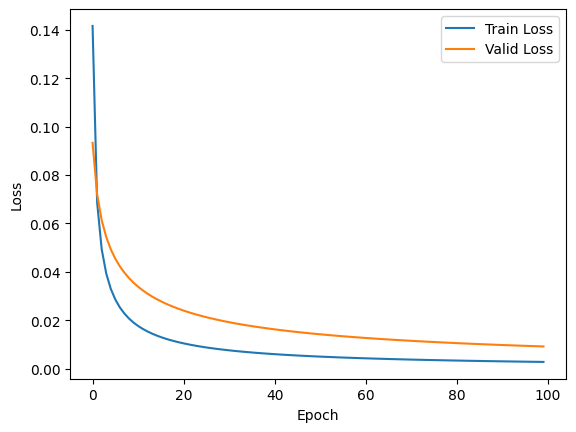

In [49]:
# 데이터 준비
train_x = train  # petal.length, petal.width
train_y = y_train   # target
valid_x = valid
valid_y = y_val

# 모델 초기화
logi = LogisticRegressor(n_features=2)

# 모델 학습
train_err, valid_err = logi.fit(
    train_x,
    train_y,
    valid_x,
    valid_y,
    epochs=100,
    lr=0.1
)
yhat = logi.predict(valid, False)

# 학습 손실 시각화
import matplotlib.pyplot as plt
plt.plot(list(range(100)), train_err, label='Train Loss')
plt.plot(list(range(100)), valid_err, label='Valid Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


We can see that the model is not overfitting because the validation loss never becomes higher than the training loss. For the Iris dataset, the model performed badly and stayed unstable throughout the training process. After testing with around 10 epochs, validation losses start to increase higher than train loss, showing clear signs of overfitting. This means the model might have overfitted to the data.

## Question 6
Predict the class labels for the testing set.

For the testing set, calculate the:

TP – number of true positives
TN – number of true negatives
FP – number of false positives
FN – number of false negatives

In [14]:
def compute_confusion_matrix(y_pred, y_true):
    """Computes the components of a confusion matrix"""
    
    # True Positives (TP)
    TP = sum((y_pred == 1) & (y_true == 1))
    # True Negatives (TN)
    TN = sum((y_pred == 0) & (y_true == 0))
    # False Positives (FP)
    FP = sum((y_pred == 1) & (y_true == 0))
    # False Negatives (FN)
    FN = sum((y_pred == 0) & (y_true == 1))
    return TP, TN, FP, FN


In [57]:
yhat = logi.predict(test, False)
y = y_test
TP, TN, FP, FN = compute_confusion_matrix(np.round(yhat), y)
print(f'- True Positive: {TP}')
print(f'- True Negative: {TN}')
print(f'- False Positive: {FP}')
print(f'- False Negative: {FN}')

- True Positive: 10
- True Negative: 20
- False Positive: 0
- False Negative: 0


## Question 7
Calculate the precision and recall and F1 score.

In [60]:
def precision(y, yhat):
    """Calculate Precision"""
    # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    TP, TN, FP, FN = compute_confusion_matrix(yhat, y)
    return TP / (TP + FP) if (TP + FP) > 0 else 0.01

def recall(y, yhat):
    """Calculate Recall"""
    # Recall is the ratio of correctly predicted positive observations to all actual positives.
    TP, TN, FP, FN = compute_confusion_matrix(yhat, y)
    return TP / (TP + FN) if (TP + FN) > 0 else 0.01

def f_beta(y, yhat, beta=1):
    """Calculates F-beta score"""
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    f_score = (1+beta**2)*((pr*rc)/(beta**2 * pr+rc))
    return(f_score)

yhat = logi.predict(test, False)
y = y_test
pr = precision(y, yhat)
rc = recall(y, yhat)
f1 = f_beta(y, yhat, beta=1)  # F1 Score (beta=1)

# Print results
print(f"Precision: {pr:.4f}")
print(f"Recall: {rc:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.0100
Recall: 0.0100
F1 Score: 0.0100


## Question 8
Generate a report using the precision, recall and F1 and confusion matrix. The report should be printed like:

In [65]:
def report(y, yhat):
    
    """For generating the report"""
    
   
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    f1_score = f_beta(y, yhat)
    
    print('|        |          | Predicted |          |')
    print('|        |          |  Positive | Negative |')
    print(f'| Actual | Positive |         {TP} |        {FP} |')
    print(f'|        | Negative |         {FN} |        {TN} |')
    print('\n')
    print(f'- Precision: {pr}')
    print(f'- Recall: {rc}')
    print(f'- F_1 Score: {f1_score }')
    return

In [72]:

y = y_val  
yhat = logi.predict(valid, logits=False) 

print(report(y, yhat))


|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |         10 |        0 |
|        | Negative |         0 |        20 |


- Precision: 0.01
- Recall: 0.01
- F_1 Score: 0.01
None


## Question 9
Calculate the true-positive and false positive rate, and from these values generate a ROC curve

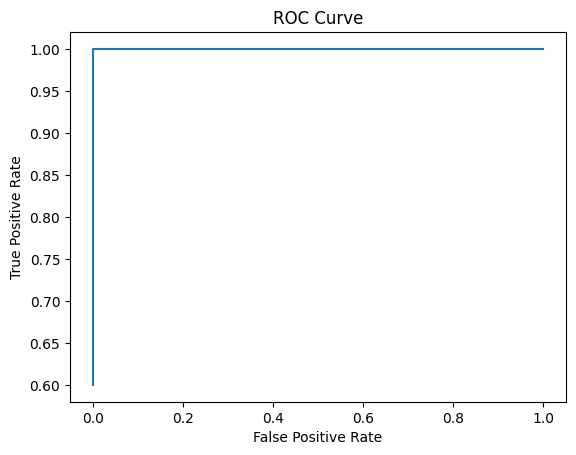

In [73]:
def roc(y, yhat, threshold_step=0.01):
    """For the ROC Curve"""
    # Iteratively increase the threshold by threshold_step,
    # calculating the TP and FP rate for each iteration.
    TPR = []  # True Positive Rate
    FPR = []  # False Positive Rate
    threshold = 0

    while threshold <= 1:
        # Apply threshold to predictions
        rounded_yhat = np.array([1 if i >= threshold else 0 for i in yhat])

        # Compute confusion matrix components
        TP, TN, FP, FN = compute_confusion_matrix(rounded_yhat, y)

        # Calculate True Positive Rate and False Positive Rate
        TPR.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
        FPR.append(FP / (FP + TN) if (FP + TN) > 0 else 0)

        # Update threshold
        threshold += threshold_step

    return TPR, FPR


# Prepare the data for ROC curve
y = y_val# The target column (last column in test data)
yhat = logi.predict(valid, logits=False)  # Predicted probabilities from the model

# Compute the ROC curve
tp, fp = roc(y, yhat)

# Visualize the ROC curve
import matplotlib.pyplot as plt

plt.plot(fp, tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## Question 10
Now that you’ve created a logistic regressor for two features of the Iris dataset and have created some analytic results. Select another two columns (i.e. petal width and sepal length, or petal length and sepal width). Create a different logistic regressor using these new columns and create the same results as you did with questions 8 and 9.

Compare these two models trained with different columns. Which model is best, and why do we know that it’s the best?

In [83]:
data = pd.read_csv("/home/joo/jnotebook/iris.csv")
data.head()
data['target'] = data['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
columns_to_drop = ['variety', 'petal.length', 'sepal.width']
data1 = data.drop(columns_to_drop, axis=1)
data1.head()


,sepal.length,petal.width,target
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


In [84]:
# Shuffle and split the data for each class
class_1 = data1[data1['target'] == 1].sample(frac=1, random_state=42).reset_index(drop=True)
class_0 = data1[data1['target'] == 0].sample(frac=1, random_state=42).reset_index(drop=True)

# Split class 1
train_1 = class_1.iloc[:int(len(class_1) * 0.7)]
val_1 = class_1.iloc[int(len(class_1) * 0.7):int(len(class_1) * 0.8)]
test_1 = class_1.iloc[int(len(class_1) * 0.8):]

# Split class 0
train_0 = class_0.iloc[:int(len(class_0) * 0.7)]
val_0 = class_0.iloc[int(len(class_0) * 0.7):int(len(class_0) * 0.8)]
test_0 = class_0.iloc[int(len(class_0) * 0.8):]

# Combine splits
train_data = pd.concat([train_1, train_0]).sample(frac=1, random_state=42).reset_index(drop=True)
val_data = pd.concat([val_1, val_0]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([test_1, test_0]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features and target
X_train = train_data.drop(columns=['target']).to_numpy()
y_train = train_data['target'].to_numpy()

X_val = val_data.drop(columns=['target']).to_numpy()
y_val = val_data['target'].to_numpy()

X_test = test_data.drop(columns=['target']).to_numpy()
y_test = test_data['target'].to_numpy()

# Standardize data
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
train = (X_train - mean) / std
valid = (X_val - mean) / std
test = (X_test - mean) / std


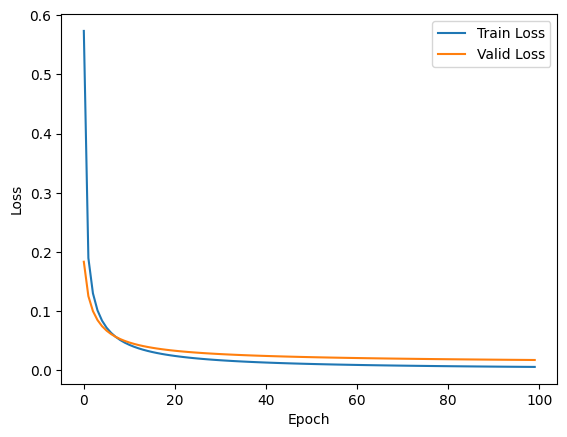

In [85]:
# 데이터 준비
train_x = train  # petal.length, petal.width
train_y = y_train   # target
valid_x = valid
valid_y = y_val

# 모델 초기화
logi = LogisticRegressor(n_features=2)

# 모델 학습
train_err, valid_err = logi.fit(
    train_x,
    train_y,
    valid_x,
    valid_y,
    epochs=100,
    lr=0.1
)
yhat = logi.predict(valid, False)

# 학습 손실 시각화
import matplotlib.pyplot as plt
plt.plot(list(range(100)), train_err, label='Train Loss')
plt.plot(list(range(100)), valid_err, label='Valid Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [86]:
yhat = logi.predict(test, False)
y = y_test
TP, TN, FP, FN = compute_confusion_matrix(np.round(yhat), y)
print(f'- True Positive: {TP}')
print(f'- True Negative: {TN}')
print(f'- False Positive: {FP}')
print(f'- False Negative: {FN}')

- True Positive: 10
- True Negative: 20
- False Positive: 0
- False Negative: 0


In [87]:
pr = precision(y, yhat)
rc = recall(y, yhat)
f1 = f_beta(y, yhat, beta=1)  # F1 Score (beta=1)

# Print results
print(f"Precision: {pr:.4f}")
print(f"Recall: {rc:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.0100
Recall: 0.0100
F1 Score: 0.0100


In [82]:
print(report(y, yhat))


|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |         10 |        0 |
|        | Negative |         0 |        20 |


- Precision: 0.01
- Recall: 0.01
- F_1 Score: 0.01
None


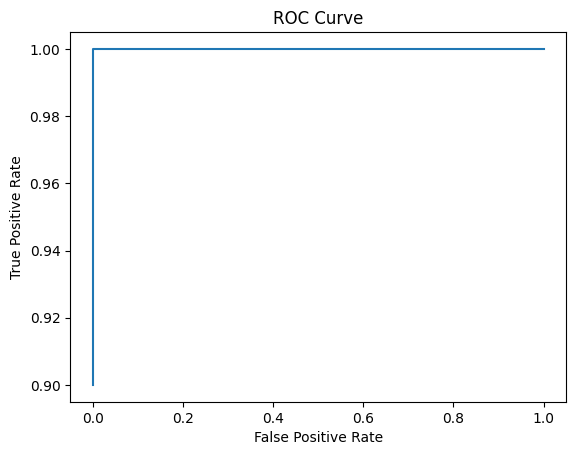

In [88]:
tp, fp = roc(y, yhat)
plt.plot(fp,tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

I have better results with the columns 'sepal.length' and 'petal.width.' Especially, I observed less overfitting in this case. However, despite the improvements in overfitting, the performance metrics remain extremely low:
Precision: 0.01
Recall: 0.01
F_1 Score: 0.01
This indicates that the model is to differentiate between the two classes effectively. In conclusion, the model with the data colums 'sepal.length' and 'petal.width.' is better than the model the data colums 'pepal.length' and 'petal.width' regarding overfitting. Nevertheless both models need to be improved and modified. 